# Data Loading and preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/ML datasets/

/content/drive/MyDrive/Colab Notebooks/ML datasets


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import layers, Sequential, models, regularizers

In [ ]:
import h5py
hf = h5py.File('datasets.h5', 'r')

In [ ]:
X = np.array(hf["/X"]).astype("uint8")
y = np.array(hf["/y"]).astype("uint8")

In [ ]:
hf.close()

In [ ]:
print("X.shape:", format(X.shape))
print("y.shape:", format(y.shape))

X.shape: (80500, 256, 192, 1)
y.shape: (80500,)


In [ ]:
from sklearn.model_selection import train_test_split
# split the dataset twice

# split into 80% training set and 20% test set
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.20, random_state=1)

# from previous training set, split into 0.6 training set and 20% validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [ ]:
y_train = y_train - 1
y_val = y_val - 1
y_test = y_test - 1

In [ ]:
print("X_train.shape:", format(X_train.shape))
print("X_test.shape:", format(X_test.shape))
print("X_val.shape:", format(X_val.shape))

X_train.shape: (48300, 256, 192, 1)
X_test.shape: (16100, 256, 192, 1)
X_val.shape: (16100, 256, 192, 1)


# CNN

In [ ]:
cnn = models.Sequential([
    #CNN
    layers.experimental.preprocessing.Rescaling(scale=1./255), #rescale to 0 - 1
    layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(256, 192, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32, kernel_size=(1,1), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    #Fully Connected Layer
    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(161, activation='softmax')
])

In [ ]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [ ]:
history = cnn.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=32)

Epoch 1/50
1510/1510 [==============================] - 45s 25ms/step - loss: 3.6847 - accuracy: 0.2166 - val_loss: 1.1872 - val_accuracy: 0.7229
Epoch 2/50
1510/1510 [==============================] - 37s 25ms/step - loss: 1.5953 - accuracy: 0.5885 - val_loss: 0.7090 - val_accuracy: 0.8351
Epoch 3/50
1510/1510 [==============================] - 36s 24ms/step - loss: 1.1191 - accuracy: 0.6941 - val_loss: 0.5492 - val_accuracy: 0.8661
Epoch 4/50
1510/1510 [==============================] - 37s 24ms/step - loss: 0.8779 - accuracy: 0.7491 - val_loss: 0.4367 - val_accuracy: 0.8893
Epoch 5/50
1510/1510 [==============================] - 37s 25ms/step - loss: 0.7354 - accuracy: 0.7838 - val_loss: 0.3899 - val_accuracy: 0.9032
Epoch 6/50
1510/1510 [==============================] - 37s 25ms/step - loss: 0.6517 - accuracy: 0.8068 - val_loss: 0.3692 - val_accuracy: 0.9052
Epoch 7/50
1510/1510 [==============================] - 37s 25ms/step - loss: 0.5629 - accuracy: 0.8290 - val_loss: 0.3572 -

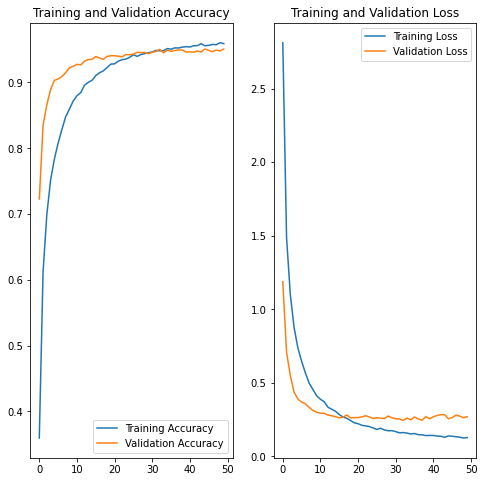

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")

plt.show()

In [ ]:
cnn.evaluate(X_test, y_test)

504/504 [==============================] - 5s 9ms/step - loss: 0.2647 - accuracy: 0.9511


[0.2647441625595093, 0.951117992401123]

In [ ]:
X_new = X_test[0:10]
y_pred_new = cnn.predict(X_new)
print(np.argmax(y_pred_new, axis=-1))
print(y_test[0:10])

[114  20 101 141  66  35 103  95  37  30]
[114  20 101 141  66  34 103  95  37  30]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        92
           1       1.00      0.99      0.99        91
           2       0.97      0.96      0.96       100
           3       1.00      0.99      0.99        98
           4       1.00      1.00      1.00        93
           5       1.00      1.00      1.00       102
           6       1.00      0.97      0.99       103
           7       0.97      0.97      0.97        97
           8       0.97      0.97      0.97       108
           9       0.96      0.89      0.92       106
          10       0.98      0.97      0.98       111
          11       0.98      0.97      0.97        97
          12       0.91      0.98      0.94        98
          13       0.92      0.92      0.92       108
          14       1.00      0.98      0.99        87
          15       0.98      0.98      0.98        86
          16       0.93      0.95      0.94       125
  